# Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score


helper plotting function

In [ ]:
def plot_predictions(y_true, y_pred, title):
    plt.figure(figsize=(6,4))
    plt.scatter(range(len(y_true)), y_true, label='True', alpha=0.6)
    plt.scatter(range(len(y_pred)), y_pred, label='Predicted', marker='x', alpha=0.7)
    plt.title(title)
    plt.xlabel('Sample index')
    plt.ylabel('Class')
    plt.legend()
    plt.show()


# Data preprocessing

In [ ]:
data=pd.read_csv(r"E:\semester 6\Machine Learning\project\horse.csv")
df = pd.DataFrame(data)

# One-hot encoding categorical columns
df = pd.get_dummies(df)
df = df.replace({True: 1, False: 0})

# Drop specified columns
df = df.drop(columns=["outcome_died", "surgical_lesion_no", "cp_data_no", "nasogastric_reflux_ph"])

# Fill missing values with column mean
df = df.fillna(df.mean(), axis=0)

# Features and labels
X = df.drop(columns=["outcome_lived", "hospital_number"])
Y = df["outcome_lived"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
x_train, x_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)

# Confirm no missing data
print(df.isna().sum())


hospital_number                    0
rectal_temp                        0
pulse                              0
respiratory_rate                   0
packed_cell_volume                 0
                                  ..
abdomo_appearance_serosanguious    0
outcome_euthanized                 0
outcome_lived                      0
surgical_lesion_yes                0
cp_data_yes                        0
Length: 66, dtype: int64


C:\Users\abdal\AppData\Local\Temp\ipykernel_32140\4016473780.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({True: 1, False: 0})


# SVM from scratch

In [6]:
class SVMFromScratch:
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)

        self._initialize_params(n_features)

        for _ in range(self.n_iters):
            self._gradient_descent(X, y_)

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

    def _initialize_params(self, n_features):
        self.w = np.zeros(n_features)
        self.b = 0

    def _gradient_descent(self, X, y):
        for idx, x_i in enumerate(X):
            condition = y[idx] * (np.dot(x_i, self.w) - self.b) >= 1
            if condition:
                self.w -= self.lr * (2 * self.lambda_param * self.w)
            else:
                self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y[idx]))
                self.b -= self.lr * y[idx]


Classification Report - SVM From Scratch
              precision    recall  f1-score   support

           0       0.92      0.85      0.88        26
           1       0.89      0.94      0.91        34

    accuracy                           0.90        60
   macro avg       0.90      0.89      0.90        60
weighted avg       0.90      0.90      0.90        60

Accuracy: 0.9000


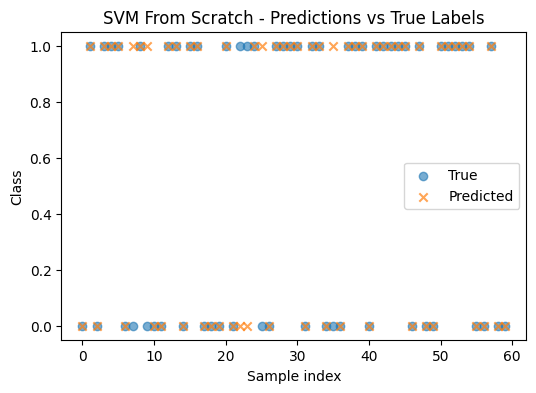

In [13]:
svm_scratch = SVMFromScratch(learning_rate=0.001, lambda_param=0.01, n_iters=1000)
svm_scratch.fit(x_train, y_train)

# Predict
y_pred_scratch = svm_scratch.predict(x_test)
y_pred_scratch = np.where(y_pred_scratch == -1, 0, 1)  # Map back to {0,1}

# Evaluate
print("Classification Report - SVM From Scratch")
print(classification_report(y_test, y_pred_scratch))
print(f"Accuracy: {accuracy_score(y_test, y_pred_scratch):.4f}")

# Visualization
plot_predictions(y_test.values, y_pred_scratch, "SVM From Scratch - Predictions vs True Labels")


# SVM using sklearn

Classification Report - Scikit-learn SVM
              precision    recall  f1-score   support

           0       0.84      0.81      0.82        26
           1       0.86      0.88      0.87        34

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60

Accuracy: 0.8500


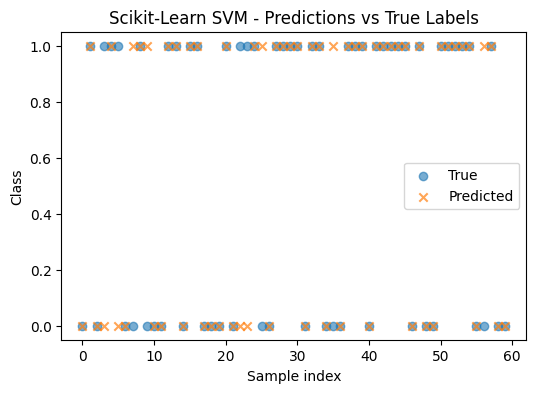

In [11]:
# Instantiate and train sklearn SVC
svm_sklearn = SVC(kernel='linear')
svm_sklearn.fit(x_train, y_train)

# Predict
y_pred_sklearn = svm_sklearn.predict(x_test)

# Evaluate
print("Classification Report - Scikit-learn SVM")
print(classification_report(y_test, y_pred_sklearn))
print(f"Accuracy: {accuracy_score(y_test, y_pred_sklearn):.4f}")

# Visualization
plot_predictions(y_test.values, y_pred_sklearn, "Scikit-Learn SVM - Predictions vs True Labels")


In [12]:
print(f"SVM From Scratch Accuracy: {accuracy_score(y_test, y_pred_scratch):.4f}")
print(f"Scikit-learn SVM Accuracy: {accuracy_score(y_test, y_pred_sklearn):.4f}")


SVM From Scratch Accuracy: 0.9000
Scikit-learn SVM Accuracy: 0.8500
